In [1]:
import matplotlib.pyplot as plt
from skimage import measure
import cmocean

from methods_create_contours import *

In [2]:
# Read time mean fields for the full domain using xarray
filepath = "../data/full_domain/"
filename = "A4mean.nc"

ds = xr.open_dataset(filepath+filename).squeeze()

In [3]:
figsize = (15,8)

Text(0.5, 1.0, 'Bathymetry')

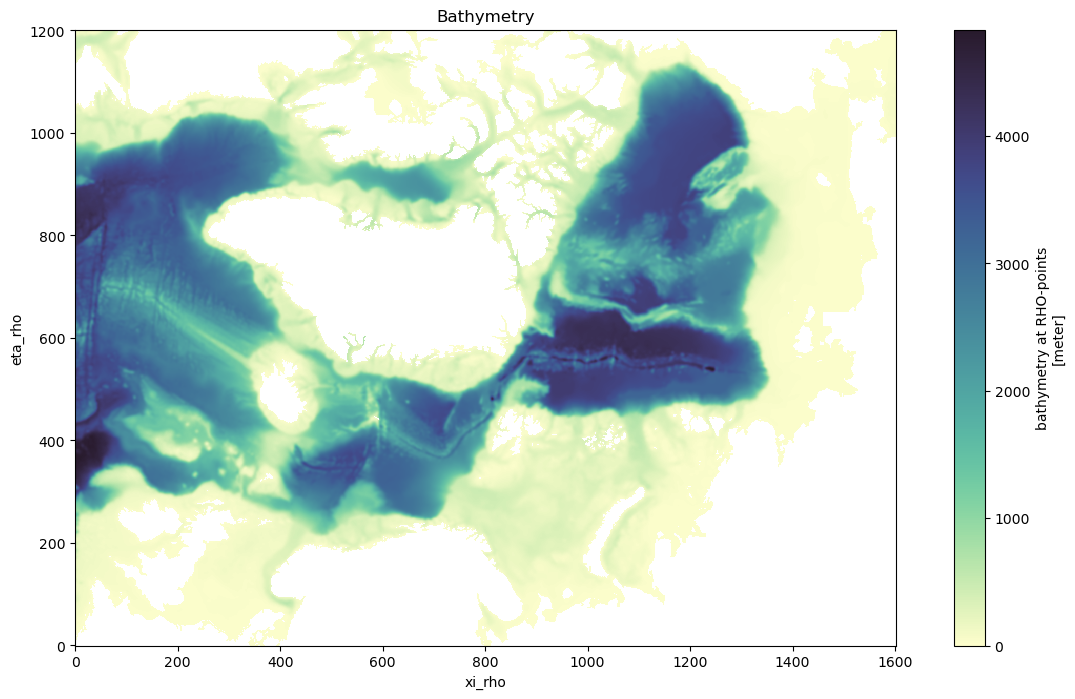

In [4]:
# select bathymetry
bath = ds.h.where(ds.mask_rho==1)

# plot bathymetry
fig, ax = plt.subplots(figsize=figsize)
bath.plot.pcolormesh(ax=ax, cmap=cmocean.cm.deep, vmin = 0)
ax.set_aspect("equal")
ax.set_title("Bathymetry")

Text(0.5, 1.0, 'Filtered bathymetry')

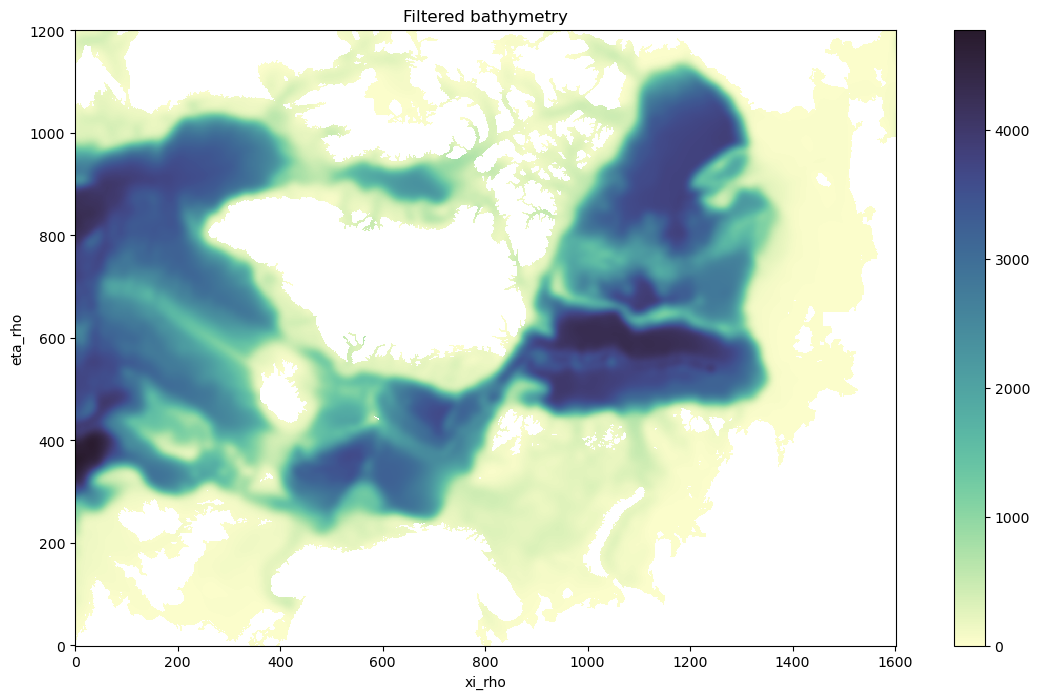

In [5]:
# filter bathymetry
filter_scale = 100e3

bath_filtered = filter_bathymetry(ds, filter_scale)

# plot filtered bathymetry
fig, ax = plt.subplots(figsize=figsize)
bath_filtered.plot.pcolormesh(ax=ax, cmap=cmocean.cm.deep, vmin = 0)
ax.set_aspect("equal")
ax.set_title("Filtered bathymetry")

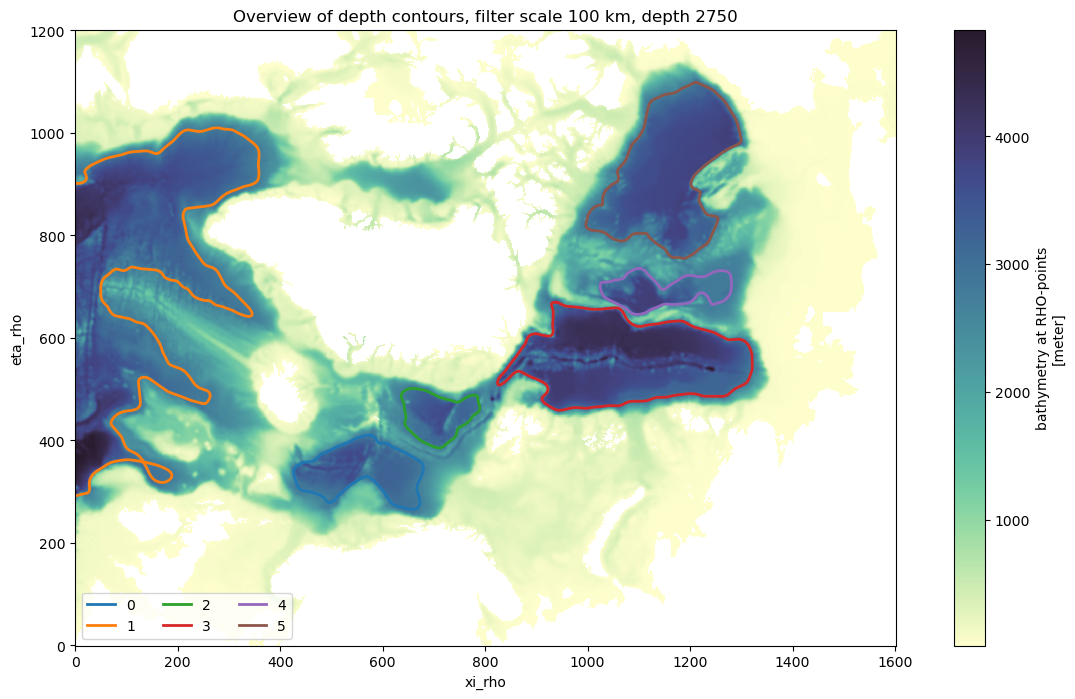

In [11]:
# Find contours at a constant value
depth = 2750

val = depth
var = bath_filtered.values
#var = var = bath.values


contours = measure.find_contours(var, val)

#remove small contours
contours = [contour for contour in contours if len(contour) > 100]

# Display the image and plot all contours found
fig, ax = plt.subplots(figsize=figsize)
ax.set_aspect('equal')
bath.plot.pcolormesh(ax=ax, cmap=cmocean.cm.deep)

for n, contour in enumerate(contours):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2, label=n)

ax.set_title(f"Overview of depth contours, filter scale {int(filter_scale/1e3)} km, depth {depth}")
ax.legend(ncol=3, loc='lower left');

In [7]:
# process and save contours to file
outpath = "../data/contours/"

# number corresponding to contour "norwegian", "greenland", "eurasian", "canadian".
# see previous plot to identify correct value
contour_n = [0, 2, 3, 5]
outnames = [f'{basin}_{depth}_{int(filter_scale)}.nc' for basin in ["norwegian", "greenland", "eurasian", "canadian"]]



pn = ds.pn 
pm = ds.pm

for n, outname in zip(contour_n, outnames):
    contour = contours[n]
    save_contour(contour, bath, pn, pm, outpath, outname)